## 보스턴 주택 가격 데이터셋

1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터가 주어졌을 때 주택 가격의 중간 값을 예측해 보겠습니다.

여기서 사용할 데이터셋은 이전 두 개의 예제와 다릅니다. 

데이터 포인트가 506개로 비교적 개수가 적고 404개는 훈련 샘플로 102개는 테스트 샘플로 나누어져 있습니다. 

입력 데이터에 있는 각 특성(예를 들어 범죄율)은 스케일이 서로 다릅니다. 

어떤 값은 0과 1 사이의 비율을 나타내고 어떤 것은 1과 12 사이의 값을 가지거나 1과 100 사이의 값을 가집니다.


In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [2]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [4]:
mean=train_data.mean(axis=0)
train_data-=mean
train_data

array([[ -2.51264057, -11.48019802,  -2.96443069, ...,   2.5240099 ,
         42.11683168,   5.97918317],
       [ -3.72334057,  71.01980198,  -9.07443069, ...,  -3.7759901 ,
         40.59683168,  -9.63081683],
       [  1.15310943, -11.48019802,   6.99556931, ...,   1.7240099 ,
         20.73683168,  -9.48081683],
       ...,
       [ -3.71045057,  23.51980198,  -5.04443069, ...,  -1.5759901 ,
          7.46683168,  -4.91081683],
       [ -1.59593057, -11.48019802,   8.47556931, ...,  -3.7759901 ,
        -92.83316832,   3.04918317],
       [ -3.73072057,  48.51980198,  -8.17443069, ...,  -2.8759901 ,
         21.91683168,  -8.36081683]])

In [9]:
std=train_data.std(axis=0)
std

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [10]:
train_data /= std

In [11]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [12]:

test_data-=mean
test_data/=std

In [13]:
train_data[:5]

array([[-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
        -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
         1.14850044,  0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, -0.25683275, -1.21518188,
         1.89434613, -1.91036058,  1.24758524, -0.85646254, -0.34843254,
        -1.71818909,  0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , -0.25683275,  0.62864202,
        -1.82968811,  1.11048828, -1.18743907,  1.67588577,  1.5652875 ,
         0.78447637,  0.22061726, -1.30850006],
       [-0.40149354, -0.48361547, -0.86940196, -0.25683275, -0.3615597 ,
        -0.3245576 , -1.23667187,  1.10717989, -0.51114231, -1.094663  ,
         0.78447637,  0.44807713, -0.65292624],
       [-0.0056343 , -0.48361547,  1.0283258 , -0.25683275,  1.32861221,
         0.15364225,  0.69480801, -0.57857203,  1.67588577,  1.5652875 ,
         0.78447637,  0.3898823 ,  0.26349695]])

테스트 데이터를 정규화할 때 사용한 값이 훈련 데이터에서 계산한 값임을 주목하세요. 

머신 러닝 작업 과정에서 절대로 테스트 데이터에서 계산한 어떤 값도 사용해서는 안 됩니다. 

데이터 정규화처럼 간단한 작업조차도 그렇습니다.



In [16]:
print(train_data.mean())
print(train_data.std())

2.602301889250862e-15
0.9999999999999994


In [18]:
from keras import models
from keras import layers

def build_model():
    # 동일한 모델을 여러 번 생성할 것이므로 함수를 만들어 사용합니다
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model



In [31]:
num_val_samples

101

In [ ]:
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    #0-101
    #101-202
    #202-303
    #303-404
    print(train_data [i * num_val_samples : (i + 1) * num_val_samples])

In [43]:
np.concatenate(
        [train_data[:3 * num_val_samples],train_data[(3 + 1) * num_val_samples:]],
        axis=0)

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.00521823, -0.48361547,  1.0283258 , ...,  0.78447637,
        -0.41229143,  0.17378685],
       [-0.38949153, -0.48361547,  2.13815109, ...,  0.28394328,
         0.16518855,  1.74854417],
       [-0.40431174,  2.67583877, -1.04432806, ...,  1.19400345,
         0.44807713,  0.28419928]])

In [48]:
train_data[(2) * num_val_samples:]

array([[-0.3957607 ,  0.78016623, -0.90762111, ..., -0.85363193,
         0.30849465, -0.74125619],
       [-0.32326326,  0.35890566, -1.04873796, ..., -2.49174024,
         0.40020204, -0.31616832],
       [-0.31346619, -0.48361547, -0.43576161, ...,  1.14850044,
         0.4015851 ,  0.1503242 ],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [41]:
  print(train_data [2 * num_val_samples : (2 + 1) * num_val_samples])

[[-0.3957607   0.78016623 -0.90762111 ... -0.85363193  0.30849465
  -0.74125619]
 [-0.32326326  0.35890566 -1.04873796 ... -2.49174024  0.40020204
  -0.31616832]
 [-0.31346619 -0.48361547 -0.43576161 ...  1.14850044  0.4015851
   0.1503242 ]
 ...
 [-0.00521823 -0.48361547  1.0283258  ...  0.78447637 -0.41229143
   0.17378685]
 [-0.38949153 -0.48361547  2.13815109 ...  0.28394328  0.16518855
   1.74854417]
 [-0.40431174  2.67583877 -1.04432806 ...  1.19400345  0.44807713
   0.28419928]]


In [55]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비만
    val_data =train_data [i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터만 준비
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # 검증 세트로 모델 평가
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)


처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [56]:
print(all_scores)
print(np.mean(all_scores))

[2.017360210418701, 2.5982396602630615, 2.7452211380004883, 2.1623573303222656]
2.380794584751129


In [57]:
from keras import backend as K

# 메모리 해제
K.clear_session()

[과제] num_epochs =500을 적용하여 모델 학습 및 평가를 수행

In [59]:
import numpy as np

num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)


처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [60]:
#에포크별 검증
import matplotlib.pyplot as plt


average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]


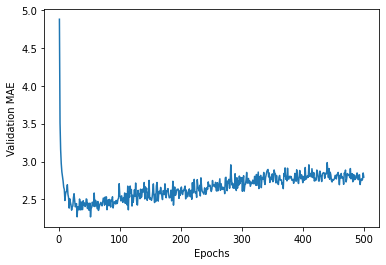

In [61]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

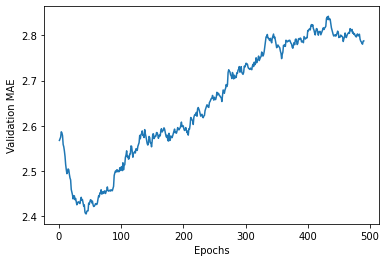

In [62]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [63]:
model = build_model()
# 전체 데이터로 훈련시킵니다
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

4/4 [==============================] - 0s 3ms/step - loss: 16.8136 - mae: 2.6725


2.672468900680542